<a href="https://colab.research.google.com/github/nishantdesai96/MECE-4520/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)



In [1]:
%matplotlib notebook
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import io

from tqdm import tqdm
from scipy import stats
from collections import Counter

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/nishantdesai96/MECE-4520/main/heart.csv")
data.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


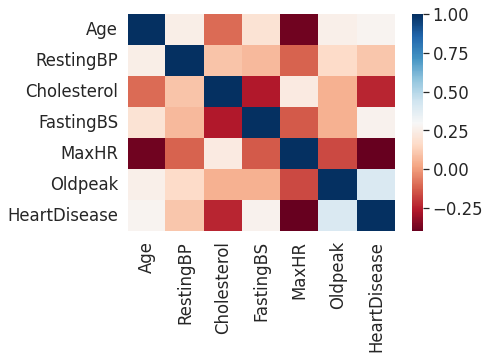

In [6]:
corr = data.corr()
hm = sns.heatmap(corr, cmap='RdBu')

(array([  4.,   7.,  16.,  44.,  54., 100., 136., 110., 126., 120.,  91.,
         73.,  31.,   5.]),
 array([ 60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180,
        190, 200]),
 <a list of 14 Patch objects>)

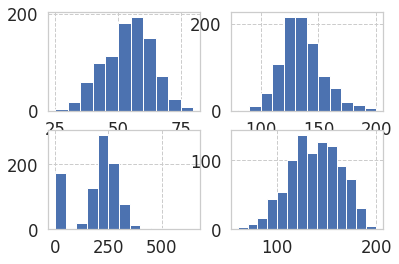

In [25]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(data['Age'], bins=[25,30,35,40,45,50,55,60,65,70,75,80])
axs[0,1].hist(data['RestingBP'], bins=[80,90,100,110,120,130,140,150,160,170,180,190,200])
axs[1,0].hist(data['Cholesterol'], bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650])
axs[1,1].hist(data['MaxHR'], bins=[60,70,80,90,100,110,120,130,140,150,160,170,180,190,200])

In [11]:
# maybe use pie chart instead plt.hist(data['FastingBS'], bins=[0,0.1,0.9,1])